#### 통계적 추정 : 모수 즉 모집단의 파라미터를 추정
- 모집단 분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있음
- 점추정 : 모수를 어느 1개의 값으로 추정하는 방법
 - 모평균 추정에 표본평균을 사용하는데 표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문임
 - 모분산의 점추정값으로 표본에서 계산된 통계량으로 불편분산을 사용
- 구간추정 : 추정값이 폭을 가지게 하는 추정 방법. 추정의 폭 계산에는 확률의 개념을 사용
 - 폭을 가지므로 추정오차를 가미할 수 있으며 추정오차가 작으면 구간 추정의 폭이 좁아짐.
 - 샘플사이즈가 커져도 구간 추정의 폭은 좁아짐
- 신뢰계수(신뢰수준)와 신뢰구간
 - 신뢰계수란 구간 추정의 폭에 대한 신뢰 정도를 확률로 표현한 것. 95%, 99%
 - 신뢰구간이란 특정 신뢰계수를 만족하는 구간
 - 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐
- 신뢰한계 : 신뢰구간의 하한값과 상한값
- 신뢰구간 계산 : "(표본평균 - 모평균) / 표준오차"로 계산한 t값. 구간추정을 할 때는 t분포의 퍼센트포인트 사용
 - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산. 
 - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%가 됨
 - 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
 - 샘플사이즈가 커지면 자유도가 커지고 표준오차가 작아짐
 - 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐
 
[모평균 μ의 신뢰구간을 추정]  

만약 누군가가 점추정를 통해 "A후보의 지지율은 54.3%입니다"라고 말한다면, 자신감 있어 보이더라도 틀린 말이 될 수 있다. 실제 지지율이 54.9%라면 말이다. 이와 같은 점추정은 틀릴 가능성이 높다. 반면 구간추정을 통해 "A후보의 지지율은 신뢰수준 95%로 신뢰구간 51.3%~57.3% 내에 있습니다"라고 말한다면, 좀 더 안전하다. 물론 구간추정도 틀릴 수 있지만, 점추정에 비하면 틀릴 가능성이 적다.  

모수가 신뢰구간 안에 포함되지 않을 확률을 보통 α 로 표현한다. 자연스럽게 모수가 신뢰구간 안에 포함될 확률, 즉 신뢰수준은 1 − α로 표현된다.  
만약 신뢰수준 1 − α이 0.95 즉, 95%라면 α = 0.05 이다.

 <img src='신뢰구간.jpg' STYLE='width:300px;'>

In [15]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/5_7_fl.csv')
df

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688
5,5.265985
6,3.272614
7,3.526691
8,4.150083
9,3.736104


In [3]:
# series 형식
fish = df['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [5]:
# 모평균의 점추정
mu = np.mean(fish)
round(mu,2)

4.19

In [6]:
# 모분산의 점추정
sigma_2 = np.var(fish, ddof=1)
round(sigma_2,2)

0.68

In [7]:
# 자유도
df = len(fish) - 1
df

9

In [9]:
# 표준오차
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
round(se,2)

0.26

In [10]:
# 신뢰구간 계산 : stats.interval(alpha 신뢰계수, df, loc, scale)
interval = stats.t.interval(
    alpha=0.95, df=df, loc=mu, scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [11]:
# 97.5% 지점
t_975 = stats.t.ppf(q=0.975,df=df)
t_975

2.2621571627409915

In [12]:
# 하측신뢰한계
lower = mu - t_975*se
lower

3.597010056835825

In [14]:
# 상측신뢰한계
upper = mu + t_975*se
upper

4.777068592173221

In [15]:
# 표준편차를 10배로 늘려서 신뢰구간 계산
# 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
se2 = (sigma*10) / np.sqrt(len(fish))
stats.t.interval( alpha=0.95, df=df, loc=mu, scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [16]:
# 샘플사이즈를 10배로 늘려서 신뢰구간 계산
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [17]:
# 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐
# 99% 신뢰수준의 신뢰구간
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)
# (3.597010056835825, 4.777068592173221) 95%

(3.3393979149413977, 5.034680734067649)

In [18]:
# 95% 신뢰수준의 신뢰구간을 구하는 시행
be_included_array = np.zeros(20000, dtype = 'bool')
be_included_array

array([False, False, False, ..., False, False, False])

In [20]:
# 신뢰구간이 모평균(4)를 포함하면 True
np.random.seed(1)
norm_dist = stats.norm(loc=4,scale=0.8)
for i in range(0,20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std/np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True
        
sum(be_included_array) / len(be_included_array)

0.948

- 통계적 가설검정은 표본을 사용해서 모집단에 대한 통계적인 판단을 내리는 방법
- 판단의 기준으로 통계적인 표현을 사용하며 간단히 검정이라고 부름
- 평균값의 차이만으로 유의미한 차이를 얻을 수 없으며 샘플사이즈와 데이터의 흩어짐 크기를 가미하는 것이 필요
- 1변량 데이터의 t검정
 - 샘플사이즈가 크고 데이터의 분산이 작고 평균값의 차이가 크다는 세가지 조건을 만족하는 지표를 t값이라고 함
 - t값 = (표본평균 - 비교대상값) / 표준오차
 - t값이 크면 유의미한 차이가 있다고 판단
- 귀무가설 대립가설
 - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
 - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률) : 표본과 귀무가설 간의 모순을 나타내는 지표
 - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준 : 귀무가설을 기각하는 기준이 되는 값
 - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음

In [25]:
junk_food = pd.read_csv('dataset/5_8_jfw.csv').weight
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

In [26]:
# 표본평균
mu = np.mean(junk_food)
mu

55.38496619666667

In [27]:
# 자유도
df = len(junk_food) - 1
df

19

In [28]:
# 표준오차
sigma = np.std(junk_food, ddof=1)
se = sigma/np.sqrt(len(junk_food))
se

1.957927680575589

In [29]:
# t값이 크면 유의미한 차이가 있다고 판단할 수 있음
# 봉지과자의 평균 중량이 50g이다.(귀무가설)
# 봉지과자의 평균 중량은 50g과 유의미하게 차이가 있다(대립가설)
t_value = (mu - 50) / se
t_value

2.750339683171343

In [30]:
# p값(유의 확률) 이 유의수준 0.05 보다 작으므로 귀무가설을 기각
# 봉지과자의 평균 중량은 50g과 유의미하게 차이가 있다는 판단이 가능
alpha = stats.t.cdf(t_value, df=df)
(1-alpha)*2 # 양측검정

0.012725590012524046

In [31]:
# t검정 : stats.ttest_1samp()
stats.ttest_1samp(junk_food,50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

- 대응표본 t검정 : 약을 먹기 전과 후에 체온의 차이를 보는 경우 사용
- 독립표본 t검정 : 큰 바늘로 낚은 물고기의 길이와 작은 바늘로 낚은 물고기의 길이의 차이를 보는 경우 사용
 - welch 근사법이라고 불리는 방법을 이용해서 p값 계산. welch 검정이라고 함

In [32]:
paired_test_data = pd.read_csv('dataset/5_9_ptt.csv')
paired_test_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [37]:
before = paired_test_data.query('medicine=="before"')['body_temperature']
after = paired_test_data.query('medicine=="after"')['body_temperature']
# 배열로 변환
before = np.array(before)
after = np.array(after)
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [38]:
# 평균값이 0과 다른지 검정
# 유의미한 차이가 있다고 주장할 수 있음
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [40]:
# 독립표본 t검정
# 평균치
mean_bef = np.mean(before)
mean_aft = np.mean(after)
# 분산
sigma_bef = np.var(before, ddof=1)
sigma_aft = np.var(after, ddof=1)
# 샘플사이즈
m=len(before)
n=len(after)
# t값
t_value=(mean_aft-mean_bef) / np.sqrt((sigma_bef/m + sigma_aft/n))
t_value


3.1557282344421034

In [41]:
# 유의미한 차이가 있다고 판단
# equal_var = False : 분산이 다르다고 가정한 t검정(Welch 검정)
stats.ttest_ind(after,before,equal_var=False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

In [42]:
# 분할표에 대한 독립성 검정
click_data = pd.read_csv('dataset/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [44]:
# 분할표
cross = pd.pivot_table(data=click_data, values='freq',
                       aggfunc='sum',index='color',columns='click')
cross

click,click,not
color,,
blue,20,230
red,10,40


In [46]:
# 카이스퀘어 통계량, p값, 자유도, 기대도수표데로 출력, 보정 안함
# 카이스퀘어 검정 시 기대도수가 전부 5 이상이어야 함
# p값이 0.05 보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단
stats.chi2_contingency(cross, correction=False)

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

[과제]
Q. "dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.  

- 4행 3열을 복사하여 수직으로 결합하여 8행 3열의 데이터프레임 df로 만드세요.
- 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행하세요.

In [1]:
!pip install statsmodels

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [20]:
beer = pd.read_csv('dataset/7_1_beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


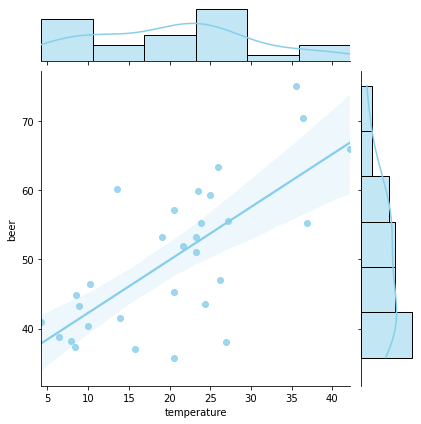

In [8]:
# 그래프
sns.jointplot(x='temperature',y='beer',kind='reg',
             data=beer,color='skyblue')

In [9]:
# 모델 구축 : 종속변수 맥주 매상, 독립변수 기온인 정규선형모델
# Ordinary Least Squares(최소제곱법)
lm_model = smf.ols(formula = 'beer ~ temperature',
                  data = beer).fit()

In [10]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           1.11e-05
Time:                        10:35:43   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 해석 : 기온이 맥주 매상에 영향을 미친다는 것을 알 수 있음
- std err : 계수의 표준오차
- P>|t| : 귀무가설을 계수의 값이 0이라고 했을 때의 p값
- 95% 신뢰구간의 하측신뢰한계와 상측신뢰한계
                             
- Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
- Df Models : 사용된 독립변수의 수
- Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨
- R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수
 - 결정계수는 가지고 있는 데이터에 대해 모델을 적용했을 때의 적합도를 평가한 지표
 - 모델에 의한 추측치가 종속변수의 실젯값과 일치하면 R-squared는 1이 됨
 - 종속변숫값의 변동 크기를 모델로 설명 가능한 변동과 모델로 설명하지 못하는 잔차제곱합을 분해할 수 있는데 결정계수는 전체 변동폭의 크기에 대한 모델로 설명 가능한 변동폭의 비율이라고 할 수 있음
- F-statistic, Prob(F-statistic) : 분산분석 결과
 - 분산분석은 평균값의 차이를 검정하는 방법
 - 분산분석을 사용할 때는 세 개 이상의 수준 간의 평균값에 차이가 있는 지 검정할 경우임
 - 모집단이 정규분포를 따르는 데이터에 대해서만 적용. 수준 사이의 분산값이 다르지 않다는 조건도 충족해야 함
 - F비 = 효과의 분산 크기 / 오차의 분산 크기. F비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단
 - 분산의 비율을 취한 통계량으로 검정을 시행하기 때문에 분산분석 또는 ANOVA라고 부름
 - F분표의 누적분포함수를 사용해서 p값을 계산하고 p값이 0.05 이하가 되면 귀무가설을 기각함
- Log-Likelihood : 최대로그우도
- AIC : 아카이케 정보 기준
- BIC : 베이즈 정보 기준

- Prob(Omnibus), Prob(JB)는 잔차의 정규성에 대한 검정결과
- 귀무가설 : 잔차가 정규분포를 따른다, 대립가설 : 잔차가 정규분포와 다르다.
- p값이 0.05보다 크다고 해도 검정의 비대칭성이 있으므로 정규분포라고 주장할 수 없음
- Skew(왜도) : 히스토그램의 좌우비대칭방향과 그 정도를 측정하는 지표.
- 왜도가 0보다 크면 오른쪽 자락이 길어짐. 정규분포의 왜도는 0
- Kurtosis(첨도) : 히스토그램의 뾰족함을 측정하는 지표. 정규분포의 첨도는 3
- Durbin-Watson : 잔차의 자기상관을 체크하는 지표. 2 전후라면 문제 없다고 판단.
- 시계열데이터를 분석하는 경우 반드시 이 지표를 체크. 잔차에 자기상관이 있으면 계수의 t검정 결과 신뢰 못함
- Durbin-Watson 통계량이 2보다 크거나 차이가 난다면 일반화 제곱법 등의 사용 검토 필요

[과제]  
df = pd.read_csv('dataset/auto-mpg.csv')
df_mw = df[['mpg','weight']]
df_mw.head()

In [14]:
# Null 모델 AIC
null_model = smf.ols('beer ~ 1',data=beer).fit()
null_model.aic

227.94194972563105

In [15]:
# 독립변수가 있는 모델의 AIC
lm_model = smf.ols('beer ~ temperature', data=beer).fit()
lm_model.aic

208.9090293557544

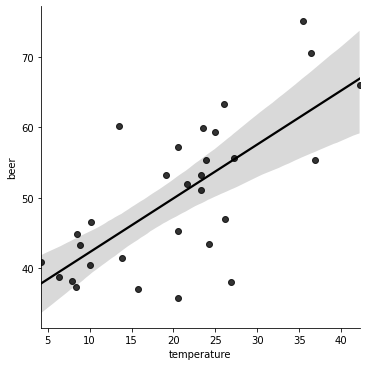

In [16]:
# 회귀직선
sns.lmplot(x='temperature',y='beer',data=beer,
          scatter_kws = {'color':'black'},
          line_kws = {'color':'black'})

In [17]:
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [18]:
# 기온이 0도일때 맥주 매상의 기대값
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [19]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [20]:
# 기온이 20일때의 맥주 매상의 기대값
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1*temperature

49.91876701095053

In [21]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [24]:
# 잔차 계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [25]:
# 잔차 = 실제값 - 예측값
y_hat = beta0 + beta1*beer.temperature
(beer.beer - y_hat).head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [26]:
# 결정계수
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2)/np.sum((y-mu)**2)

0.503959323061188

In [27]:
lm_model.rsquared

0.5039593230611856

In [38]:
# 수정된 결정계수 : 독립변수가 늘어나는 것에 대해 패널티을 적용한 결정계수
# 독립변수의 수가 늘어나면 결정계수가 큰 값이 되며 
# 과학습을 일으킬 소지가 있으므로 조정이 필요
n = len(beer.beer)
s = 1 # 독립변수의 수
1 - ((np.sum(resid**2) / (n - s - 1)) / 
    (np.sum((y - mu)**2) / (n - 1)))

0.4862435845990851

In [34]:
lm_model.rsquared_adj

0.4862435845990851

In [28]:
# 종속변수의 변동 크기는 모델로 설명가능한 변동과 
# 모델로 설명하지 못하는 잔차제곱합으로 분해할 수 있다.
np.sum((y-mu)**2)

3277.1146666666655

In [29]:
np.sum((yhat - mu)**2) + sum(resid**2)

3277.1146666666727

<AxesSubplot:ylabel='Density'>

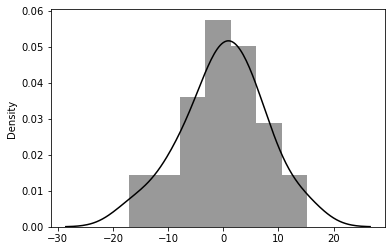

In [42]:
# 잔차 그래프
import warnings
warnings.filterwarnings('ignore')
sns.distplot(resid,color='black')

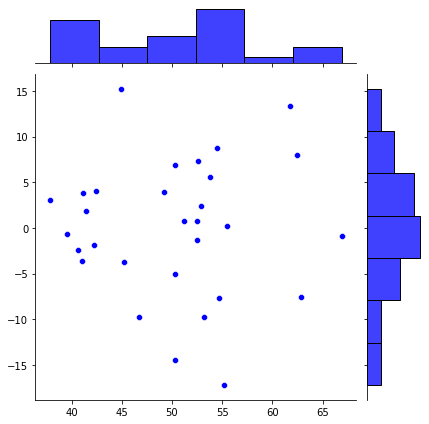

In [43]:
# 잔차의 산포도 : x축 적합도, y축 잔차
sns.jointplot(lm_model.fittedvalues, resid,
             joint_kws={'color':'blue'},
             marginal_kws={'color':'blue'})

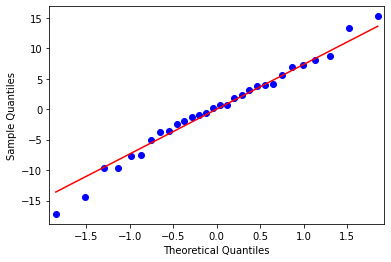

In [44]:
# Q-Q플롯 : 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것
# 이론상의 분위점과 실제 데이터의 분위점을 구해서 그 둘을 비교하는 것으로 잔차가
# 정규분포에 근접하는지 시각적으로 판단
fig = sm.qqplot(resid,line='s')

### 분산분석
- 정규선형모델 중에서 독립변수가 카테고리형 변수인 모델을 분산분석 모델이라고 하며 분산분석은 또한 검정방법의 이름이기도 함
- 분산분석은 정규선형모델에서 폭넓게 이용되는 검정방법으로 평균값의 차이를 검정하는 방법
- 평균값의 차이 겁정은 t검정을 이용하지만 세 개 이상의 수준간의 평균값 차이 검정은 분산분석을 사용
- 모집단이 정규분포을 따르는 데이터에 대해서만 적용, 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족
- 자료를 분석하는 데 자료의 분산을 활용하는 통계기법으로 실험이나 관측에서 독립변수와 종속변수의 관계를 분석하는데 활용
- "온도는 생산성에 영향을 주는가?", "유통되는 약들이 당뇨에 미치는 효과는 같은가?"와 같은 과제를 분석
- 여러 정신과 환자들이 상담, 명상, 그리고 바이오 피드백 세 가지 치료법을 시도하려고 한다. 이 중에서 다른 치료법보다 나은 치료 방법이 있는가?
- 한 제조업체는 전구를 만드는 두 가지 공법이 있다. 한 방법이 다른 방법 보다 나은가?
- 서로 다른 두 학교의 학생들이 같은 시험을 치르려고 한다. 이 때 한 학교가 다른 학교보다 성적이 더 나은가?
- 독립변수는 정성적이거나 정량적일 수 있으며 예에서 온도는 정량적이며 약은 정성적임
- 온도가 인자라고 하면 10도, 20도, 30도 와 같이 몇 개의 값을 가지며 인자를 구성하는 몇 가지 특성을 수준이라 함
- 각 수준은 독립적인 모집단을 구성하고 이에 따라 확률변수가 정의됨
- 분산분석은 서로 다른 수준을 갖는 모집단들을 대상으로 그들의 평균에 의미가 있는 차이가 있는지 없는지를 검정
- 인자가 하나인 분산분석을 일원분산분석, 둘이면 이원분산분석, 셋 이상이면 통틀어 다원분산분석이라고 함
- 집단 또는 수준은 동일한 독립변수 내의 묶음을 의미한다. “씨리얼의 종류” 라는 독립변수가 있다면, 코코볼, 콘푸로스트, 오레오 오즈는 그 아래의 세 수준이 될 수 있다. “칼로리” 라는 독립변수의 경우에는 가당과 무가당 두 가지 수준을 가질 수 있음
- 일원분산분석에서는 하나의 인자의 수준만 처리가 되나 이원분산분석에서는 두 인자의 수준들이 조합되어 처리됨
- 다음의 가정에 기초
 - 모든 모집단의 확률변수는 정규분포를 갖는다
 - 모든 모집단의 확률변수의 분산은 sigma squared로 동일하다
 - 표본은 무작위로 추출되면 모든 표본은 서로 독립적이다

In [45]:
# 샘플 데이터
weather = [
    'cloudy','cloudy',
    'rainy','rainy',
    'sunny','sunny'
]
beer = [6,8,2,4,10,12]
w_beer = pd.DataFrame({
    'beer':beer,
    'weather':weather
})
w_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

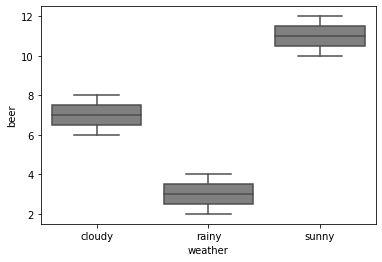

In [46]:
# box plot
sns.boxplot(x='weather',y='beer', data=w_beer, color='gray')

In [47]:
# 날씨별 매상의 평균치
w_beer.groupby('weather').mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


In [48]:
# 날씨에 의한 영향 : 2일씩 6일에 대한 날씨별 매상의 평균치
effect = [7,7,3,3,11,11]

In [49]:
# 군간 변동 : 군간 제곱합
mu_effect = np.mean(effect)
squared_model = np.sum((effect - mu_effect)**2)
squared_model

64.0

In [50]:
# 오차
resid = w_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [52]:
# 군내 제곱합 : 오차의 평균값은 0
squared_resid = np.sum(resid**2)
squared_resid

6

In [55]:
df_model = 2 # 군간변동의 자유도(수준의 종류에 따라 결정. 수준(3) - 1)
df_resid = 3 # 군내변동의 자유도(샘플사이즈와 수준의 종류에 따라 결정. 샘플(6)-3=3)

In [56]:
# 군간 평균제곱(분산)
variance_model = squared_model/df_model
variance_model

32.0

In [57]:
# 군내 평균제곱(분산)
variance_resid = squared_resid/df_resid
variance_resid

2.0

In [ ]:
# F비 = 효과의 분산 크기 / 오차의 분산 크기. 
# F비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단

In [58]:
# F비 : 군간 분산과 군내 분산의 비
f_ratio = variance_model/variance_resid
f_ratio

16.0

In [60]:
import scipy as sp
# p값은 F분포의 누적분포함수에서 계산. sp.stats.f.cdf 함수를 사용
# p값이 0.05 이하이므로 날씨에 의한 매상이 유의미하게 변한다고 판단
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

In [61]:
anova_model = smf.ols('beer ~ weather', data=w_beer).fit()

In [62]:
# 분산분석표
sm.stats.anova_lm(anova_model,typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [63]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [64]:
# 독립변수를 카테고리형 변수로 한 일반선형모델의 예측치는 각 수준의 평균값과 일치
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [21]:
# 분산분석이라는 검정 방법은 일반선형모형에서 일반적으로 사용. 독립변수가 연속형이어도 가능
beer = pd.read_csv('dataset/7_1_beer.csv')
beer.head()
# 모델 추정
lm_model = smf.ols('beer ~ temperature', data=beer).fit()

In [70]:
df_lm_model = 1 # 모델의 자유도(추정된 파라미터(2) - 1)
df_lm_resid = 28 # 잔차의 자유도(샘플사이즈(30) - 추정된 파라미터(2))

In [72]:
# F비 계산
lm_effect = lm_model.fittedvalues
# 잔차
lm_resid = lm_model.resid
# 기온의 효과 크기
mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect-mu)**2)
variance_lm_model = squares_lm_model/df_lm_model
# 잔차의 크기
squares_lm_resid = np.sum((lm_resid)**2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F비
f_value_lm=variance_lm_model / variance_lm_resid
f_value_lm

28.446983688504666

In [73]:
# p값
1 - sp.stats.f.cdf(
    x=f_value_lm,dfn=df_lm_model,dfd=df_lm_resid)

1.1148907825053733e-05

In [74]:
# 분산분석표
sm.stats.anova_lm(lm_model,dfd=df_lm_resid)

,df,sum_sq,mean_sq,F,PR(>F)
temperature,1.0,1651.532489,1651.532489,28.446984,0.000011
Residual,28.0,1625.582178,58.056506,NaN,NaN


In [75]:
# 독립변수가 1개인 경우에는 계수의 t검정 결과와 분산분석의 결과가 일치
# t검정 결과 모델 summary
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           1.11e-05
Time:                        15:50:22   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# 독립변수가 여럿인 모델
sales = pd.read_csv('dataset/7_3_lmm.csv')
sales.head()

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy


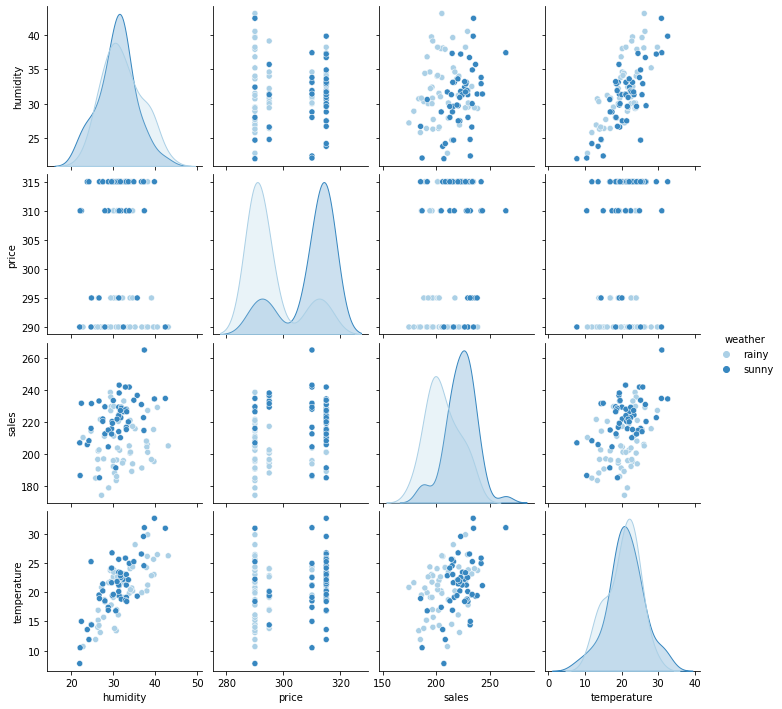

In [78]:
# pairplot()
sns.pairplot(data=sales, hue='weather',palette='Blues')

In [23]:
# 독립변수에 가격만 사용한 단순회귀모델 추정
lm_p = smf.ols('sales ~ price',sales).fit()
lm_p.params

Intercept    113.645406
price          0.332812
dtype: float64

In [24]:
# 가격은 매상에 대해 유의미한 영향이 있고 가격이 오르면 매상도 증가 : 잘못된 분석
sm.stats.anova_lm(lm_p,typ=2)

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


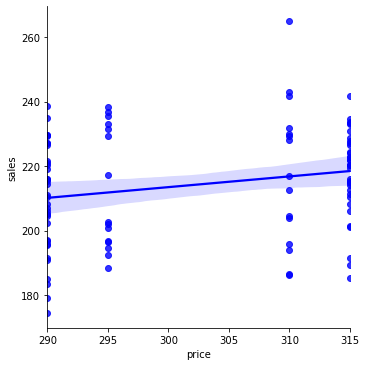

In [82]:
sns.lmplot(x='price',y='sales',data=sales,
          scatter_kws = {'color':'blue'},
          line_kws = {'color':'blue'})

In [83]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


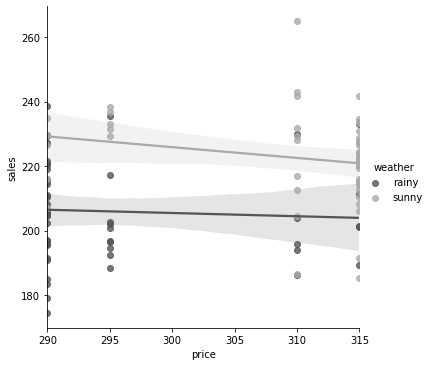

In [84]:
sns.lmplot(x='price',y='sales',data=sales,
          hue='weather',palette='gray')

In [25]:
# 독립변수 4개인 모델 추정
lm_sales = smf.ols(
'sales ~ weather + humidity + temperature + price', data=sales ).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [86]:
sm.stats.anova_lm(lm_sales).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [26]:
lm_sales2 = smf.ols(
'sales ~ weather + temperature + humidity + price', data=sales ).fit()
sm.stats.anova_lm(lm_sales2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [27]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [28]:
# 분산분석 대신 회귀계수의 t검정 수행하면 같은 문제 발생되지 않음
# 검정 다중성의 문제 발생
lm_sales2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [ ]:
# Type II ANOVA : 독립변수의 순서와 상관없이 검정 결과가 일치

In [34]:
# 모든 변수가 포함된 모델의 잔차제곱합
mod_full = smf.ols(
    'sales ~ weather + humidity + temperature + price', sales ).fit()
resid_sq_full = np.sum(mod_full.resid**2)
resid_sq_full

17242.71694236649

In [35]:
# 습도만 제거한 모델의 잔차제곱합
mod_non_humi = smf.ols(
    'sales ~ weather + temperature + price', sales ).fit()
resid_sq_non_humi = np.sum(mod_non_humi.resid**2)
resid_sq_non_humi

17299.142016107657

In [36]:
resid_sq_non_humi - resid_sq_full  

56.42507374116758

In [37]:
sm.stats.anova_lm(mod_full,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [38]:
# AIC를 이용한 변수 선택 : 습도를 제외한 모델의 AIC가 더 작음을 확인
print(mod_non_humi.aic.round(3))
print(mod_full.aic.round(3))

807.112
808.785


In [39]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

- AIC를 이용한 모델 선택은 절차적으로 보면 거의 기계적으로 수행 가능
- 계수의 t검정과 달리 여러 카테고리를 가진 변수라 하더라도 검정의 다중성을 걱정할 필요 없음
- 검정의 비대칭성 문제도 없음

- 독립변수간에 강한 상관관계가 있을때 나타나는 문제가 다중공선성.
- 기온과 습도간의 상관관계가 높아 한쪽을 제거
- 다중공선성이 있으면 추정된 계수의 해석이 어려워지고 검정에서 얻은 p값 역시 해석이 어려움
- 리지회귀 등을 이용함으로써 완화할 수 있음

Q. 모집단에서 표본 추출시 샘플사이즈나 실행횟수를 바꿔가면서 표본평균을 계산하는 사용자 함수를 작성하고 다음을 수행하세요.(모집단 : 평균 4, 표준편차 0.8 인 정규분포)
- size = 5, n_trial = 10
- size = 10, n_trial = 20

In [4]:
import numpy as np
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0,n_trial):
        population = stats.norm(loc=4,scale=0.8)
        sample = population.rvs(size=size)  # 모집단에서 size만큼 표본 추출
        sample_mean_array[i] = np.mean(sample)  # 표본평균 저장
    return(sample_mean_array)

print(calc_sample_mean(5,10))
print(calc_sample_mean(10,20))

[4.25978649 4.58051578 3.78884942 3.62055738 4.10141791 3.7986614
 3.98572322 3.98632656 3.83478348 4.02768948]
[3.84881909 3.40966861 3.91547271 4.01586795 3.98262424 4.1316761
 3.82575523 3.72938354 3.86832971 4.14985735 4.65413254 3.93130389
 3.59880461 3.97040539 3.69095195 4.51389398 4.44620746 3.85952532
 3.63801487 4.14563118]


Q. 1 ~ 100 사이의 짝수로 구성된 배열을 생성해서 50개의 샘플 사이즈를 만드세요.

In [5]:
size_array = np.arange(2,102,2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

Q. 샘플 사이즈 변동에 따른 표본편차의 시뮬레이션
- size = size_array, n_trial = 100일 경우

In [6]:
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0,len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i],n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)
sample_mean_std_array


array([0.4754462 , 0.4285657 , 0.30414517, 0.32924535, 0.25856595,
       0.24626845, 0.23742025, 0.16226763, 0.19798736, 0.18870299,
       0.16754595, 0.16234703, 0.1654929 , 0.14444792, 0.15400405,
       0.14877245, 0.14241811, 0.12698156, 0.13151882, 0.11471949,
       0.12300885, 0.12191558, 0.12164469, 0.11209033, 0.11048279,
       0.10275882, 0.10812035, 0.11096544, 0.09798184, 0.09843221,
       0.10069034, 0.10466181, 0.10505264, 0.0909866 , 0.09954995,
       0.09844713, 0.1063186 , 0.08799258, 0.09110622, 0.08788447,
       0.1012906 , 0.10069518, 0.07995633, 0.08095862, 0.08223575,
       0.07559803, 0.07985282, 0.07994538, 0.08189658, 0.07557071])

Q. 모집단(평균 4, 표준편차 0.8인 정규분포)에서 표본을 추출시 표준오차를 구하세요

In [8]:
population = stats.norm(loc=4,scale=0.8)
standard_error = population.std()/np.sqrt(size_array)
standard_error

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

Q. 시뮬레이션 결과와 표준오차의 값을 그래프로 비교하세요.

Text(0, 0.5, 'mean std value')

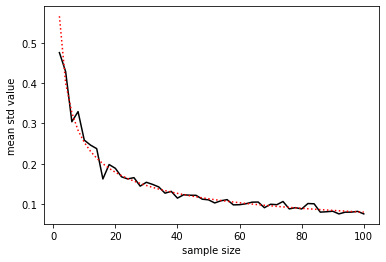

In [10]:
plt.plot(size_array, sample_mean_std_array,color='black')
plt.plot(size_array, standard_error, color='red',linestyle='dotted')
plt.xlabel('sample size')
plt.ylabel('mean std value')